<a href="https://colab.research.google.com/github/realmeelo/AI_Assignment/blob/main/New_Capstone_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
#@title Install libraries
!pip install Opencv-python

In [2]:
#@title Import Libraries
import tensorflow as tf
from tensorflow import keras

import torch
import torchvision

import numpy as np
import pandas as pd

from PIL import Image
import cv2
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
import os
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import glob


In [10]:
#@title Unzip file
!unzip /content/armyWorm.zip -d /content/my_dataset

Archive:  /content/armyWorm.zip
  inflating: /content/my_dataset/armyWorm/1.jpg  
  inflating: /content/my_dataset/armyWorm/10.jpg  
  inflating: /content/my_dataset/armyWorm/100.jpg  
  inflating: /content/my_dataset/armyWorm/101.jpg  
  inflating: /content/my_dataset/armyWorm/102.jpg  
  inflating: /content/my_dataset/armyWorm/103.jpg  
  inflating: /content/my_dataset/armyWorm/104.jpg  
  inflating: /content/my_dataset/armyWorm/105.jpg  
  inflating: /content/my_dataset/armyWorm/106.jpg  
  inflating: /content/my_dataset/armyWorm/107.jpg  
  inflating: /content/my_dataset/armyWorm/108.jpg  
  inflating: /content/my_dataset/armyWorm/109.jpg  
  inflating: /content/my_dataset/armyWorm/11.jpg  
  inflating: /content/my_dataset/armyWorm/110.jpg  
  inflating: /content/my_dataset/armyWorm/111.jpg  
  inflating: /content/my_dataset/armyWorm/112.jpg  
  inflating: /content/my_dataset/armyWorm/113.jpg  
  inflating: /content/my_dataset/armyWorm/114.jpg  
  inflating: /content/my_dataset/arm

In [11]:
#@title Set Random Seeds
np.random.seed(42)
tf.random.set_seed(42)

print("="*60)
print("FALL ARMYWORM DETECTION - AI MODEL TRAINING")
print("="*60)


FALL ARMYWORM DETECTION - AI MODEL TRAINING


Found 863 images in /content/my_dataset/armyWorm/
Successfully loaded and resized 863 images.


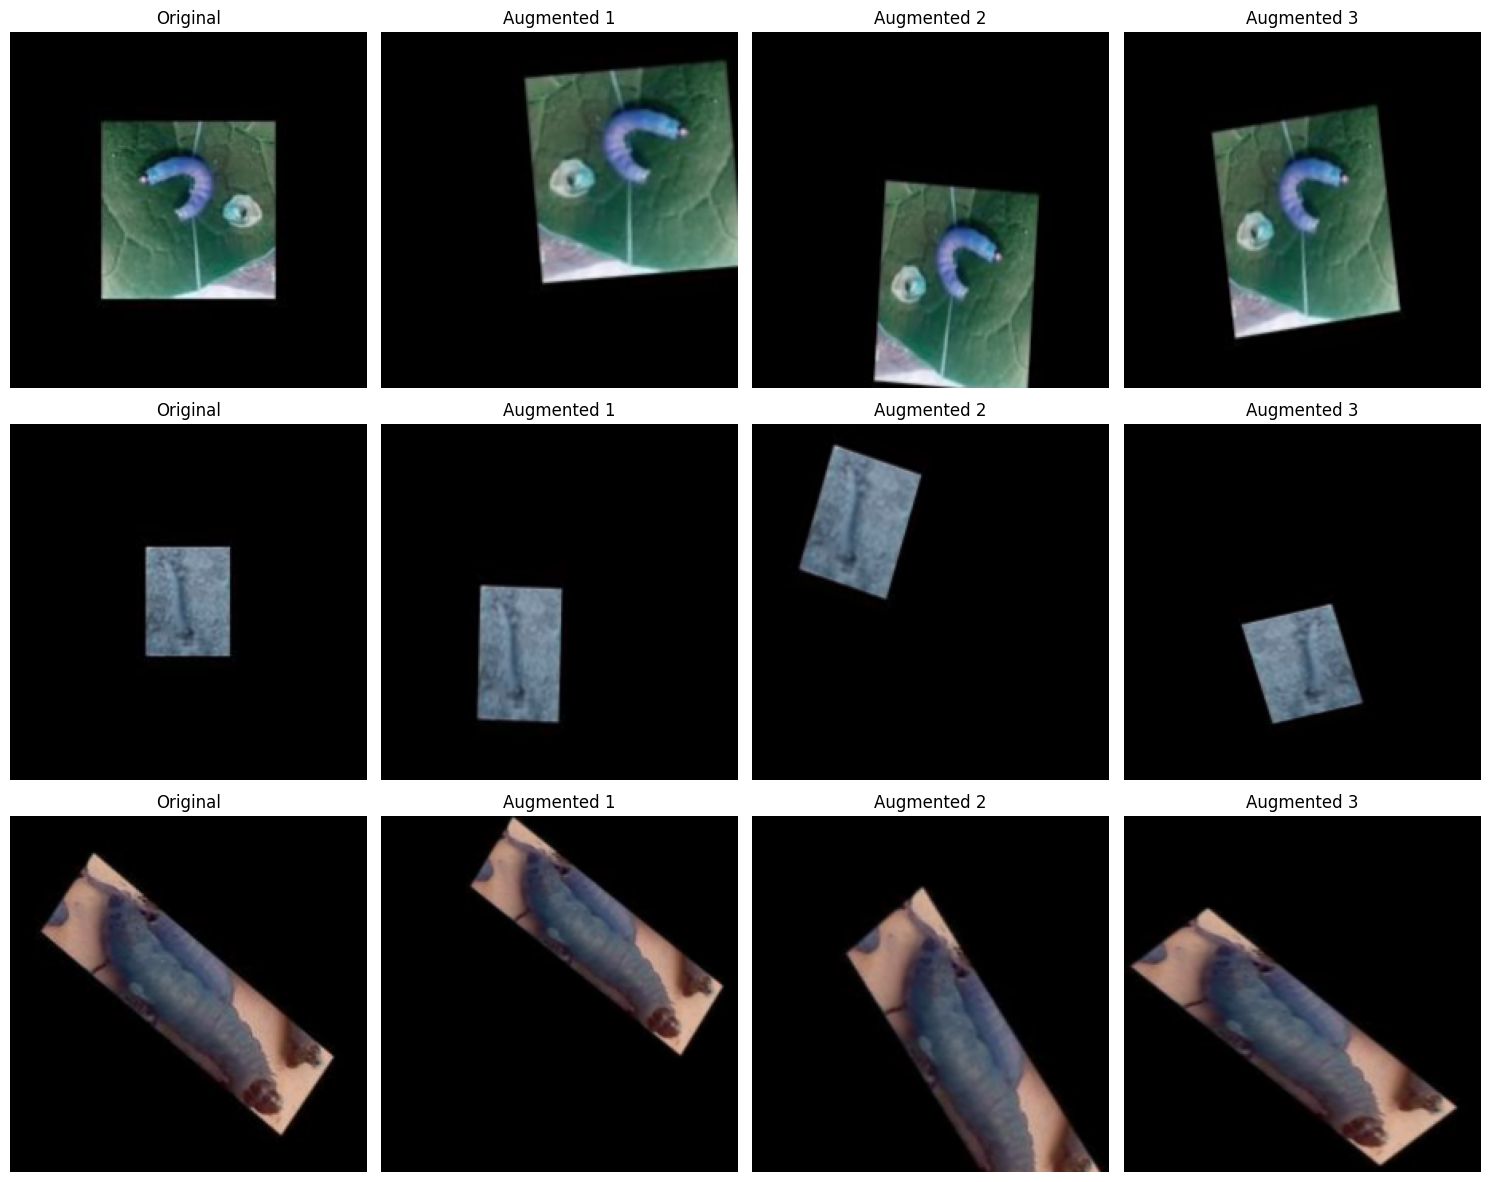

In [15]:
#@title Data Preprocessing

# Load images from the directory using glob
image_dir = '/content/my_dataset/armyWorm/'
image_paths = glob.glob(image_dir + '*.jpg') # Get all .jpg files in the directory

images = []
print(f"Found {len(image_paths)} images in {image_dir}")

for image_path in image_paths:
    try:
        # Load the image using OpenCV
        image = cv2.imread(image_path)
        if image is not None:
            # Resize the image
            resized_image = cv2.resize(image, (224, 224)) # Specify desired width and height
            images.append(resized_image)
        else:
            print(f"Warning: Could not load image from {image_path}")
    except Exception as e:
        print(f"Error processing image {image_path}: {e}")


print(f"Successfully loaded and resized {len(images)} images.")

# Assuming 'images' is a list of loaded and resized images
# Normalize pixel values to be between 0 and 1
normalized_images = [img.astype('float32') / 255.0 for img in images]

# Assuming 'images' is a list of NumPy arrays
# Data Augmentation (setup for a single image, will need adjustment for batch processing)
datagen = ImageDataGenerator(
    rotation_range=20,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest'
)

# To use ImageDataGenerator for augmentation on multiple images, you would typically use flow_from_directory
# or flow method with your image data and labels.
# The following code is for demonstrating augmentation on a single image if needed later.
# Assuming 'image' is a NumPy array and has the shape (height, width, channels)
# Reshape for single image augmentation if needed: (1, height, width, channels)
# image_for_augmentation = np.expand_dims(images[0], axis=0) # Example with the first loaded image

# Generate augmented images (example for a single image)
# augmented_images_iterator = datagen.flow(image_for_augmentation, batch_size=1)

# Display a few augmented images (example for a single image)
# fig, axes = plt.subplots(1, 3, figsize=(15, 5))
# for i in range(3):
#     augmented_image = augmented_images_iterator.next()[0].astype('uint8')
#     axes[i].imshow(augmented_image)
#     axes[i].axis('off')
# plt.show()

# Demonstrate augmentation on a few loaded images
num_images_to_augment = 3
fig, axes = plt.subplots(num_images_to_augment, 4, figsize=(15, num_images_to_augment * 4))
axes = axes.flatten()

for i in range(num_images_to_augment):
    if i < len(images):
        # Reshape for augmentation (ImageDataGenerator expects a batch)
        image_for_augmentation = np.expand_dims(images[i], axis=0)

        # Original image
        axes[i*4].imshow(images[i])
        axes[i*4].set_title("Original")
        axes[i*4].axis('off')

        # Generate and display augmented images
        augmented_images_iterator = datagen.flow(image_for_augmentation, batch_size=1)
        for j in range(1, 4):
            augmented_image = next(augmented_images_iterator)[0].astype('uint8')
            axes[i*4 + j].imshow(augmented_image)
            axes[i*4 + j].set_title(f"Augmented {j}")
            axes[i*4 + j].axis('off')
    else:
        # Hide unused subplots if fewer than num_images_to_augment are available
        for j in range(4):
            fig.delaxes(axes[i*4 + j])

plt.tight_layout()
plt.show()